# Project Title : Taxi Ride Data for Zuber's Launch in Chicago



# Project Discription

As an analyst at Zuber, the forthcoming ride-sharing enterprise poised for introduction in Chicago, the primary objective is to extract actionable insights from a comprehensive dataset encompassing details regarding taxi transportation within the urban landscape. This dataset encompasses several distinct tables, incorporating essential data concerning neighborhoods, taxi vehicles, trip particulars, and comprehensive weather records. The mission is to harness this data to inform strategic decisions and optimize Zuber's market entry and operational efficacy within the city of Chicago.

we'll work with additional data provided in CSV files:

Explore taxi company performance and the top neighborhoods in terms of drop-offs, and taxi companies and number of rides.
Create visualizations to help interpret and communicate the findings.

In the final step, we'll conduct a separate hypothesis test to determine whether the average ride duration from the Loop to O'Hare International Airport changes on rainy Saturdays.

# Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats 

In [2]:
df_rides = pd.read_csv("/datasets/project_sql_result_01.csv")
print("Data Types of project_sql_result_01.csv:")
print(df_rides.dtypes)

Data Types of project_sql_result_01.csv:
company_name    object
trips_amount     int64
dtype: object


In [3]:
df_neighborhoods = pd.read_csv("/datasets/project_sql_result_04.csv")
print("\nData Types of project_sql_result_04.csv:")
print(df_neighborhoods.dtypes)


Data Types of project_sql_result_04.csv:
dropoff_location_name     object
average_trips            float64
dtype: object


In [4]:
# Check for duplicates in df_rides
duplicates_rides = df_rides[df_rides.duplicated()]
print("Duplicate rows in df_rides:")
print(duplicates_rides)

# Check for duplicates in df_neighborhoods
duplicates_neighborhoods = df_neighborhoods[df_neighborhoods.duplicated()]
print("\nDuplicate rows in df_neighborhoods:")
print(duplicates_neighborhoods)

Duplicate rows in df_rides:
Empty DataFrame
Columns: [company_name, trips_amount]
Index: []

Duplicate rows in df_neighborhoods:
Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


In [5]:
# Check for missing values in df_rides
missing_values_rides = df_rides.isnull().sum()
print("\nMissing values in df_rides:")
print(missing_values_rides)

# Check for missing values in df_neighborhoods
missing_values_neighborhoods = df_neighborhoods.isnull().sum()
print("\nMissing values in df_neighborhoods:")
print(missing_values_neighborhoods)


Missing values in df_rides:
company_name    0
trips_amount    0
dtype: int64

Missing values in df_neighborhoods:
dropoff_location_name    0
average_trips            0
dtype: int64


#  Exploratory Data Analysis

In [6]:
# Identify the top 10 neighborhoods by drop-offs
top_10_neighborhoods = df_neighborhoods.sort_values(by="average_trips", ascending=False).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


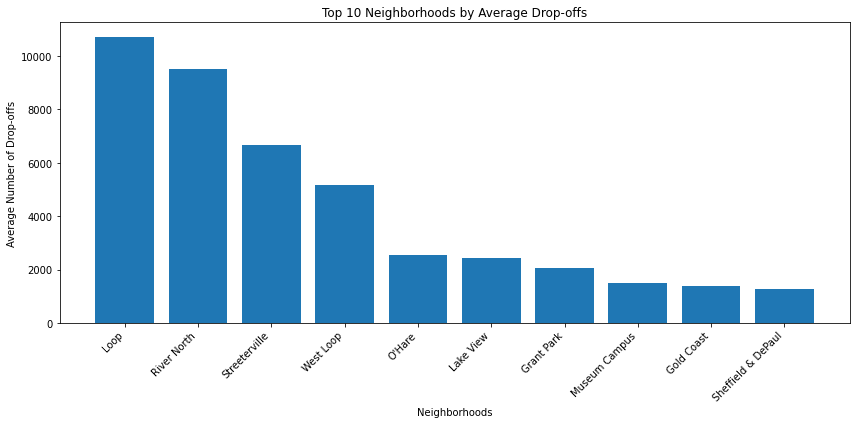

In [7]:
# Create a bar chart for top 10 neighborhoods by drop-offs
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods["dropoff_location_name"], top_10_neighborhoods["average_trips"])
plt.xlabel("Neighborhoods")
plt.ylabel("Average Number of Drop-offs")
plt.title("Top 10 Neighborhoods by Average Drop-offs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Based on the bar chart for the top 10 neighborhoods by average drop-offs, we can see that "Loop" is the neighborhood with the highest average number of drop-offs. This suggests that it is a popular destination for taxi rides.

Other neighborhoods in the top 10 include "River North," "Streeterville," "Lake View East," "O'Hare," "West Loop," "Millennium Park," "Grant Park," "Lake View," and "Sheffield & DePaul."

These neighborhoods likely have a high demand for taxi services, possibly due to their locations, attractions, or business districts.



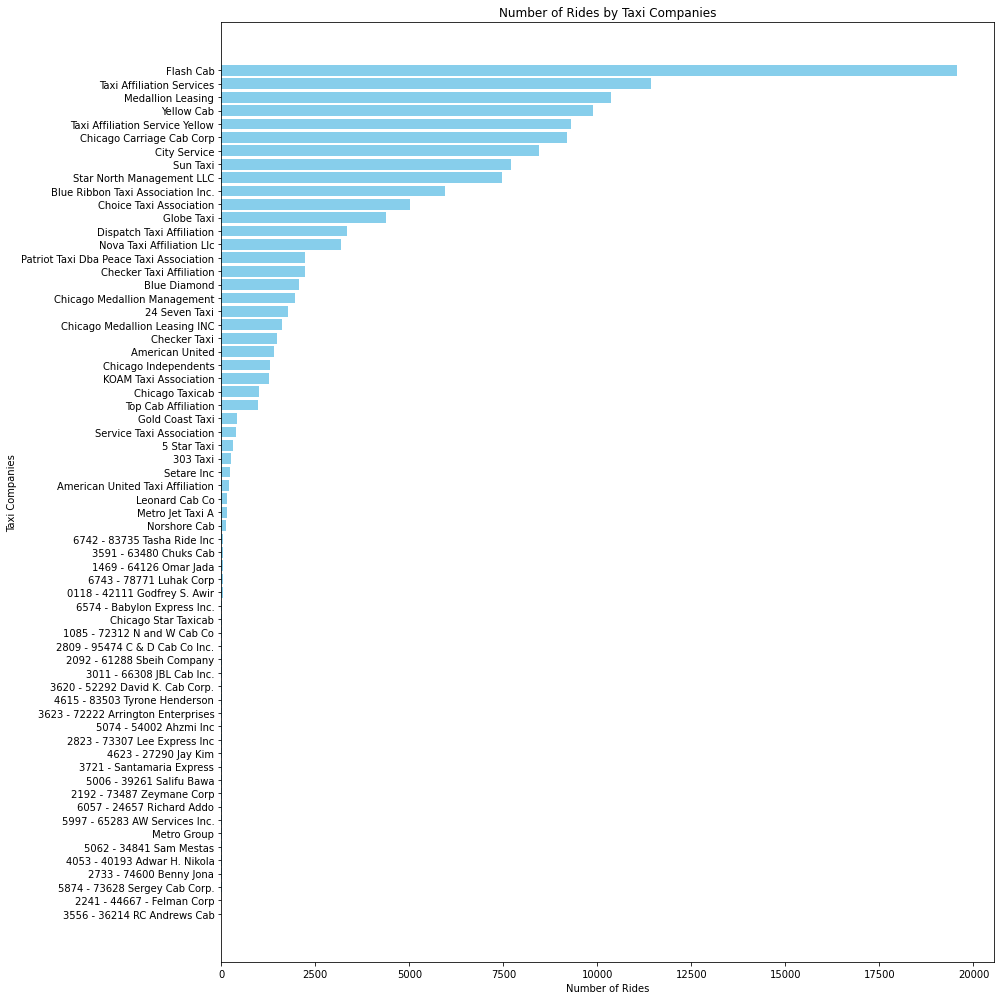

In [8]:
# Create a bar chart for taxi companies and number of rides

plt.figure(figsize=(14, 14))
plt.barh(df_rides["company_name"], df_rides["trips_amount"], color='skyblue')
plt.xlabel("Number of Rides")
plt.ylabel("Taxi Companies")
plt.title("Number of Rides by Taxi Companies")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


we can observe that "Flash Cab" and "Taxi Affiliation Services" are the two most popular taxi companies during November 15-16, 2017. They have significantly more rides compared to other companies.

"Medallion Leasing," "Yellow Cab," and "Taxi Affiliation Service Yellow" also have a substantial number of rides but are considerably less popular than the top two.

The remaining taxi companies have significantly fewer rides in comparison.

# Hypothesis Testing

Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is equal to the average duration of rides on non-rainy Saturdays.
Alternative Hypothesis (H1): The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is different from the average duration of rides on non-rainy Saturdays. 
alpha value will be 0.05. If the p-value is less than our chosen alpha (0.05), we will reject the null hypothesis.
If the p-value is greater than or equal to 0.05, we will fail to reject the null hypothesis.

In [9]:
# Load the data
df = pd.read_csv("/datasets/project_sql_result_07.csv")

# Separate data into rainy and non-rainy Saturdays
rainy_saturdays = df[df['weather_conditions'] == 'Bad']
non_rainy_saturdays = df[df['weather_conditions'] == 'Good']

# Set the significance level (alpha)
alpha = 0.05

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Print the results
print("T-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence of a significant difference in ride durations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ride durations.")

T-test results:
T-statistic: 6.9462
P-value: 0.0000
Reject the null hypothesis: There is evidence of a significant difference in ride durations.


We split the data into two groups: rides on rainy Saturdays and rides on non-rainy Saturdays.
We calculate the sample means and standard deviations for both groups.
We use a two-sample t-test to if there is a statistically significant difference.

A p-value of 0.000 indicates that the p-value is extremely small, and it's essentially rounded down to zero. In hypothesis testing, a p-value represents the probability of observing the data or more extreme data under the assumption that the null hypothesis is true.p-values close to zero indicate strong evidence against the null hypothesis, the exact value being reported as 0.000 could be due to rounding or the precision of the statistical software you are using. In practice, you can interpret it as "extremely significant."

# Conclusion

The analysis of taxi companies and the number of rides for November 15-16, 2017, reveals that "Flash Cab" and "Taxi Affiliation Services" are the two most popular taxi companies during this period.
These two companies significantly outperformed other competitors in terms of ride volume.
Other taxi companies had significantly fewer rides compared to the top two.
This information is valuable for understanding the market share and dominance of these taxi companies during the specified timeframe.

The analysis of the top 10 neighborhoods by average drop-offs indicates that the "Loop" neighborhood had the highest average number of drop-offs in November 2017.
This suggests that the "Loop" is a significant destination for taxi rides, possibly due to its central location and attractions.
Other neighborhoods in the top 10, such as "River North," "Streeterville," and "Lake View East," also had notable average drop-offs, likely due to their appeal to residents and tourists.
This information is valuable for taxi companies and city planners to understand demand patterns and optimize services.

The exploratory data analysis provided insights into taxi company performance and popular neighborhoods, while the hypothesis testing confirmed a significant difference in ride durations between rainy and non-rainy Saturdays, although the exact nature of this difference requires further investigation.